In [1]:
#SCRIPT TO CREATE THE AUTOMATION FUNCTION
from tools import *

In [2]:
csv =pd.read_csv(r"C:\Users\cjang.WILDCAT\Desktop\eis\test", names = ['name', 'recal_indices', 'mask_choice'],index_col = 0, sep = " ", header = None)

In [3]:
mpt = mpt_data(path = r"C:\Users\cjang.WILDCAT\Desktop\eis\eis_manager\data\\", data = [csv.iloc[0].name])

In [4]:
mpt.guesser()

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_R2,fit_n2,fit_fs2,fit_Q2,fit_Q3,fit_n3
0,copy.mpt,0.026666,1032.344315,0.731358,NaN,9.953415e-08,5259.849145,1.0,NaN,0.000003,0.000056,0.495477


No handles with labels found to put in legend.


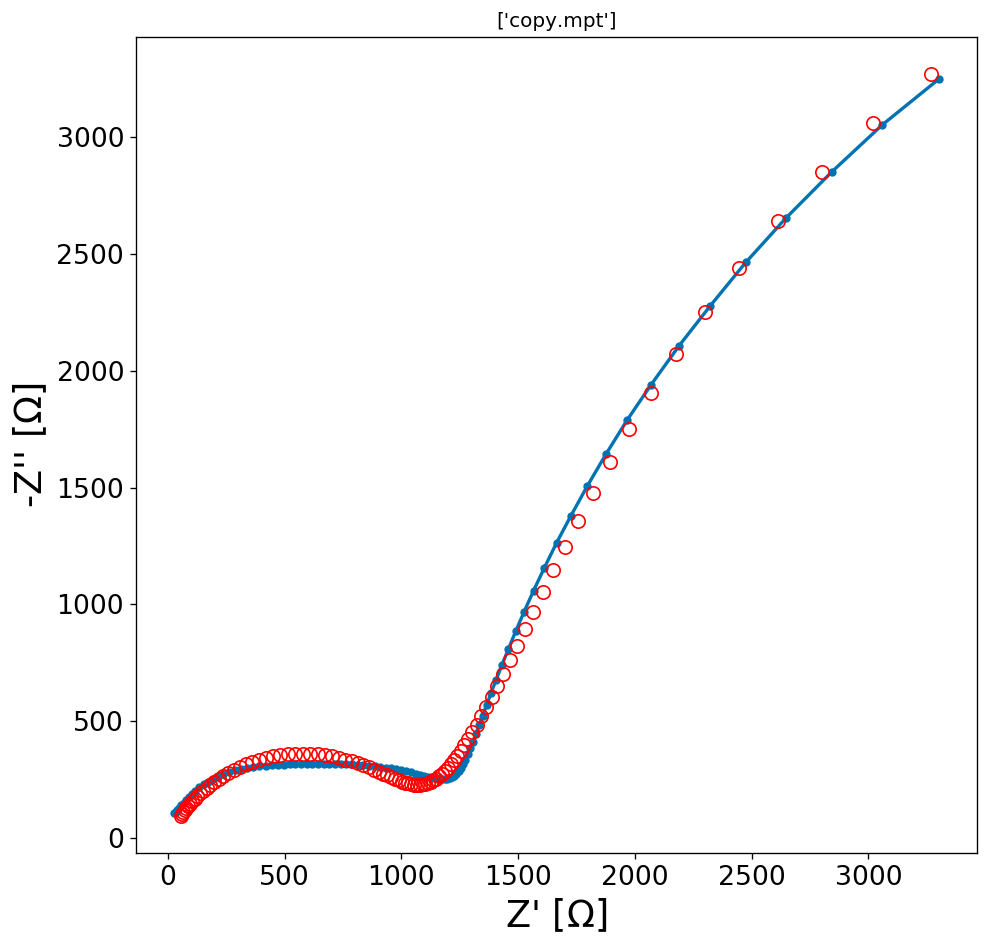

In [5]:
mpt.mpt_plot(fitting = 'on', save_fig = True)

In [3]:
#AUTO FUNCTION
from tools import *
import logging
logging.getLogger().setLevel(logging.CRITICAL)
import math
def auto_fit(path, csv, save_fig = False):
    final_coeffs = []
    for i in range(len(csv)):
        #print(i)
        mpt = mpt_data(path = path, data = [csv.iloc[i].name])
        #print(mpt.data)
        if len((csv.iloc[i].mask_choice.strip('[')).strip('];')) == 1:
            mask_choice = mpt.fast_mask()
            masked_mpt = mpt_data(path = path, data = [csv.iloc[i].name], mask = mask_choice)
            #print(len(masked_mpt.df[0]))
            if (csv.iloc[i].mask_choice.strip('[')).strip('];') == "1":
                if type((csv.iloc[i].recal_indices)) == str:
                    #print(csv.iloc[i].recal_indices)
                    pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                    edited_inds = [int(i) for i in pre_inds]
                    #print(edited_inds)
                    for ind in edited_inds:
                        if ind == "[":
                            continue
                        elif ind == "]":
                            continue
                        else:      
                            if ind in masked_mpt.df[0].index:  
                                masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                            else:
                                continue
                    #print(len(masked_mpt.df[0]))
                else:
                    #print('guessing...')
                    continue
                #print(masked_mpt.guesser(save_fig = save_fig))
                final_coeffs.append(masked_mpt.guesser())
                masked_mpt.mpt_plot(fitting = 'on', save_fig = True)
            elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "2":
                mask_choice = mpt.masker0()
                masked_mpt = mpt_data(path = path, data = [csv.iloc[i].name], mask = mask_choice)
                if type((csv.iloc[i].recal_indices)) == str:
                    #print(csv.iloc[i].recal_indices)
                    pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                    edited_inds = [int(i) for i in pre_inds]
                    #print(edited_inds)
                    for ind in edited_inds:
                        if ind == "[":
                            continue
                        elif ind == "]":
                            continue
                        else:      
                            if ind in masked_mpt.df[0].index:  
                                masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                            else:
                                continue
                    #print(len(masked_mpt.df[0]))
                else:
                    #print('guessing...')
                    continue
                #print(masked_mpt.guesser(save_fig = save_fig))
                final_coeffs.append(masked_mpt.guesser())
                masked_mpt.mpt_plot(fitting = 'on', save_fig = True)
            elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "3":
                mask_choice = mpt.masker()
                masked_mpt = mpt_data(path =  path, data = [csv.iloc[i].name], mask = mask_choice)
                if type((csv.iloc[i].recal_indices)) == str:
                    #print(csv.iloc[i].recal_indices)
                    pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                    edited_inds = [int(i) for i in pre_inds]
                    #print(edited_inds)
                    for ind in edited_inds:
                        if ind == "[":
                            continue
                        elif ind == "]":
                            continue
                        else:      
                            if ind in masked_mpt.df[0].index:  
                                masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                            else:
                                continue
                    #print(len(masked_mpt.df[0]))
                else:
                    #print('guessing...')
                    continue
                #print(masked_mpt.guesser(save_fig = save_fig))
                final_coeffs.append(masked_mpt.guesser())
                masked_mpt.mpt_plot(fitting = 'on', save_fig = True)
            elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "4":
                if type((csv.iloc[i].recal_indices)) == str:
                    #print(csv.iloc[i].recal_indices)
                    pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                    edited_inds = [int(i) for i in pre_inds]
                    #print(edited_inds)
                    for ind in edited_inds:
                        if ind == "[":
                            continue
                        elif ind == "]":
                            continue
                        else:      
                            if ind in masked_mpt.df[0].index:  
                                mpt.df[0] = mpt.df[0].drop(ind,axis=0)
                            else:
                                continue
                    #print(len(masked_mpt.df[0]))
                else:
                    #print('guessing...')
                    continue
                #print(mpt.guesser(save_fig = save_fig))
                final_coeffs.append(masked_mpt.guesser())
                masked_mpt.mpt_plot(fitting = 'on', save_fig = True)
            else:
                print('bad masking choice')
        else:
            #print([str(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')])
            raw_window = [str(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')]
            #print(mpt.window_masker([raw_window[0],raw_window[1]], [raw_window[2],raw_window[3]]))
            mask_choice = mpt.window_masker([float(raw_window[0]),float(raw_window[1])], [float(raw_window[2]),float(raw_window[3])])
            masked_mpt = mpt_data(path =  path, data = [csv.iloc[i].name], mask = mask_choice)
            #print((str(csv.iloc[i].recal_indices).strip('[')).strip(']'))
            if (str(csv.iloc[i].recal_indices).strip('[')).strip(']') != 'nan':
                pre_inds =(str(csv.iloc[i].recal_indices).strip('[')).strip(']').split(',') 
                #print(pre_inds)
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
                #print(masked_mpt.guesser(save_fig = save_fig))
                final_coeffs.append(masked_mpt.guesser())
                masked_mpt.mpt_plot(fitting = 'on', save_fig = True)
            else:
                #print(masked_mpt.guesser(save_fig = save_fig))
                final_coeffs.append(masked_mpt.guesser())
                masked_mpt.mpt_plot(fitting = 'on', save_fig = True)
    
    for i in range(len(final_coeffs)-1):
        final_coeffs[0] = final_coeffs[0].append(final_coeffs[i+1])
    final_coeffs[0].drop(columns = ['fit_fs1', 'fit_fs2'], inplace = True)
    final_coeffs[0].to_csv(r"C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\utils\fitted_folder\\output.txt", sep = ",", index=False)

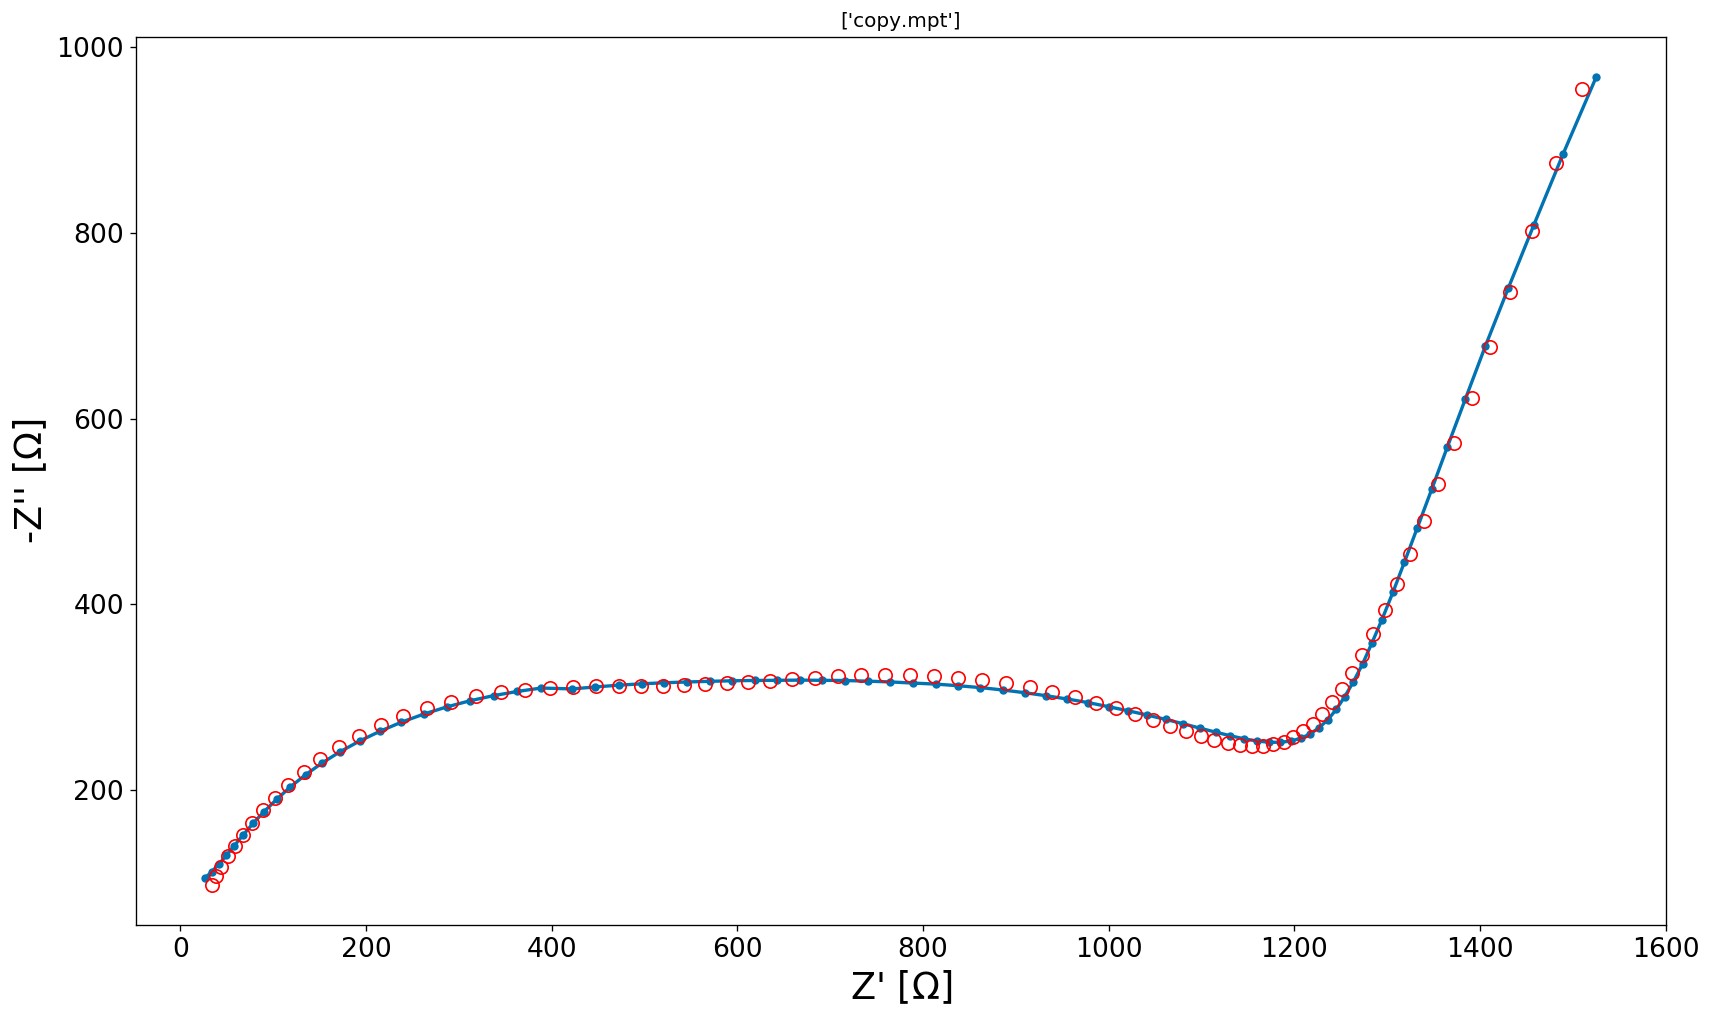

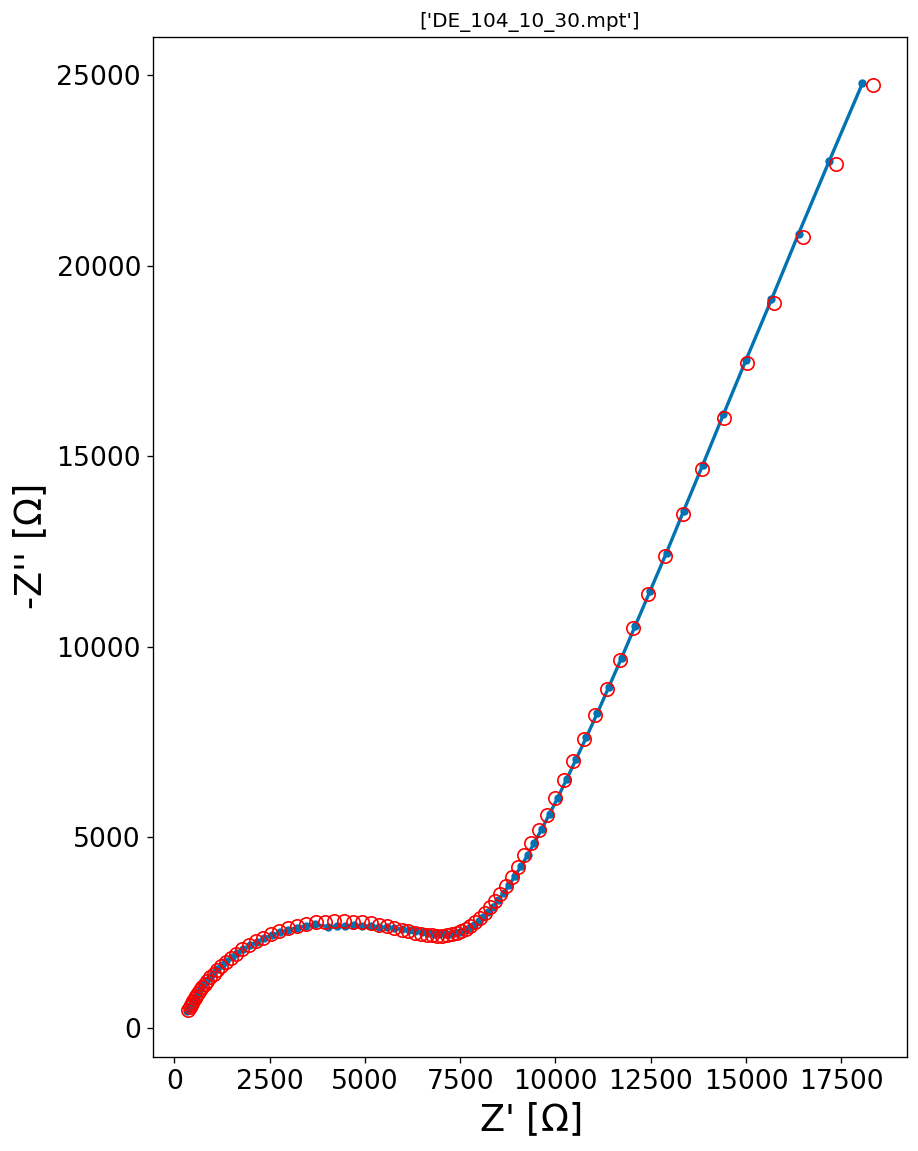

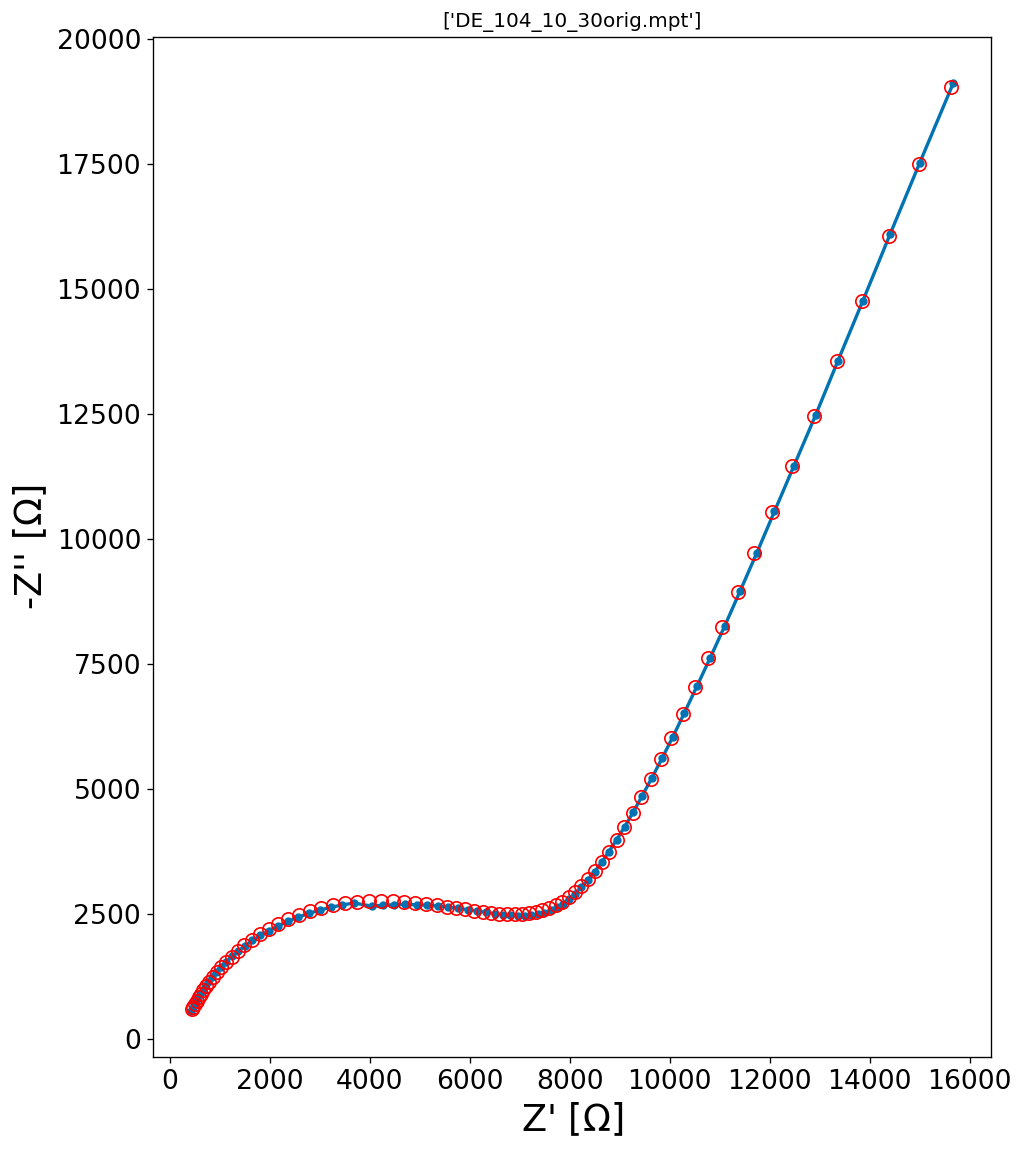

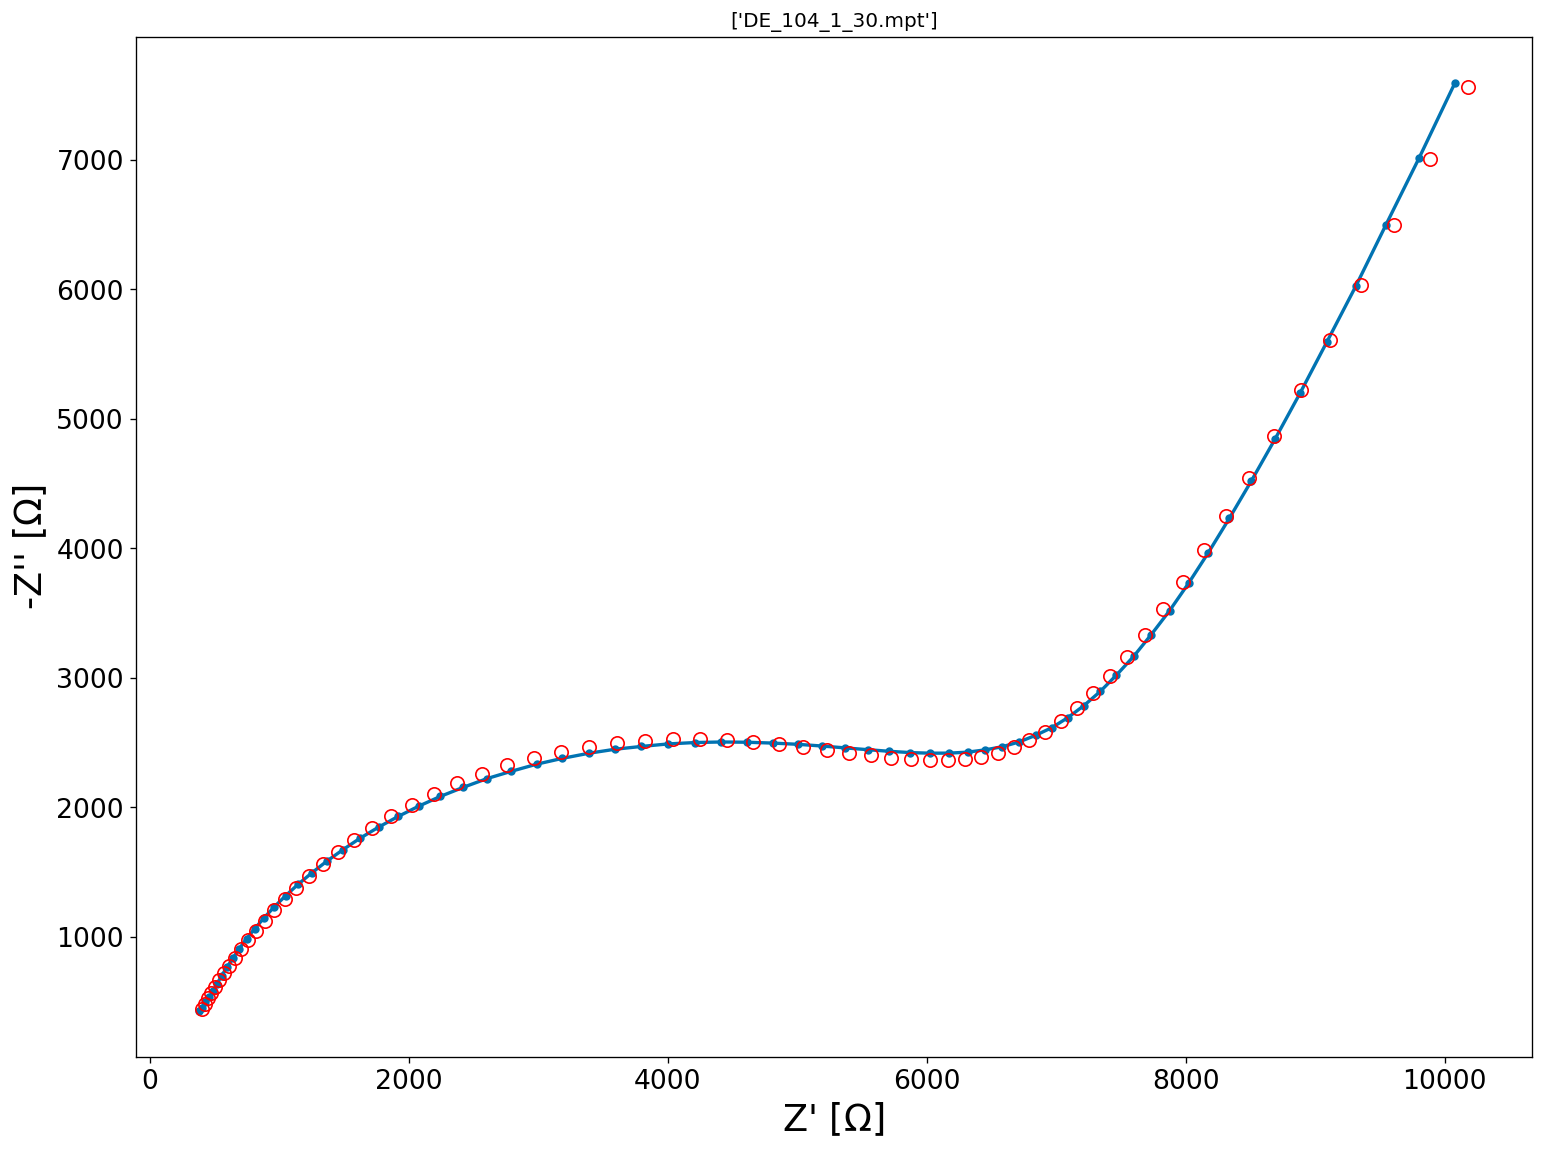

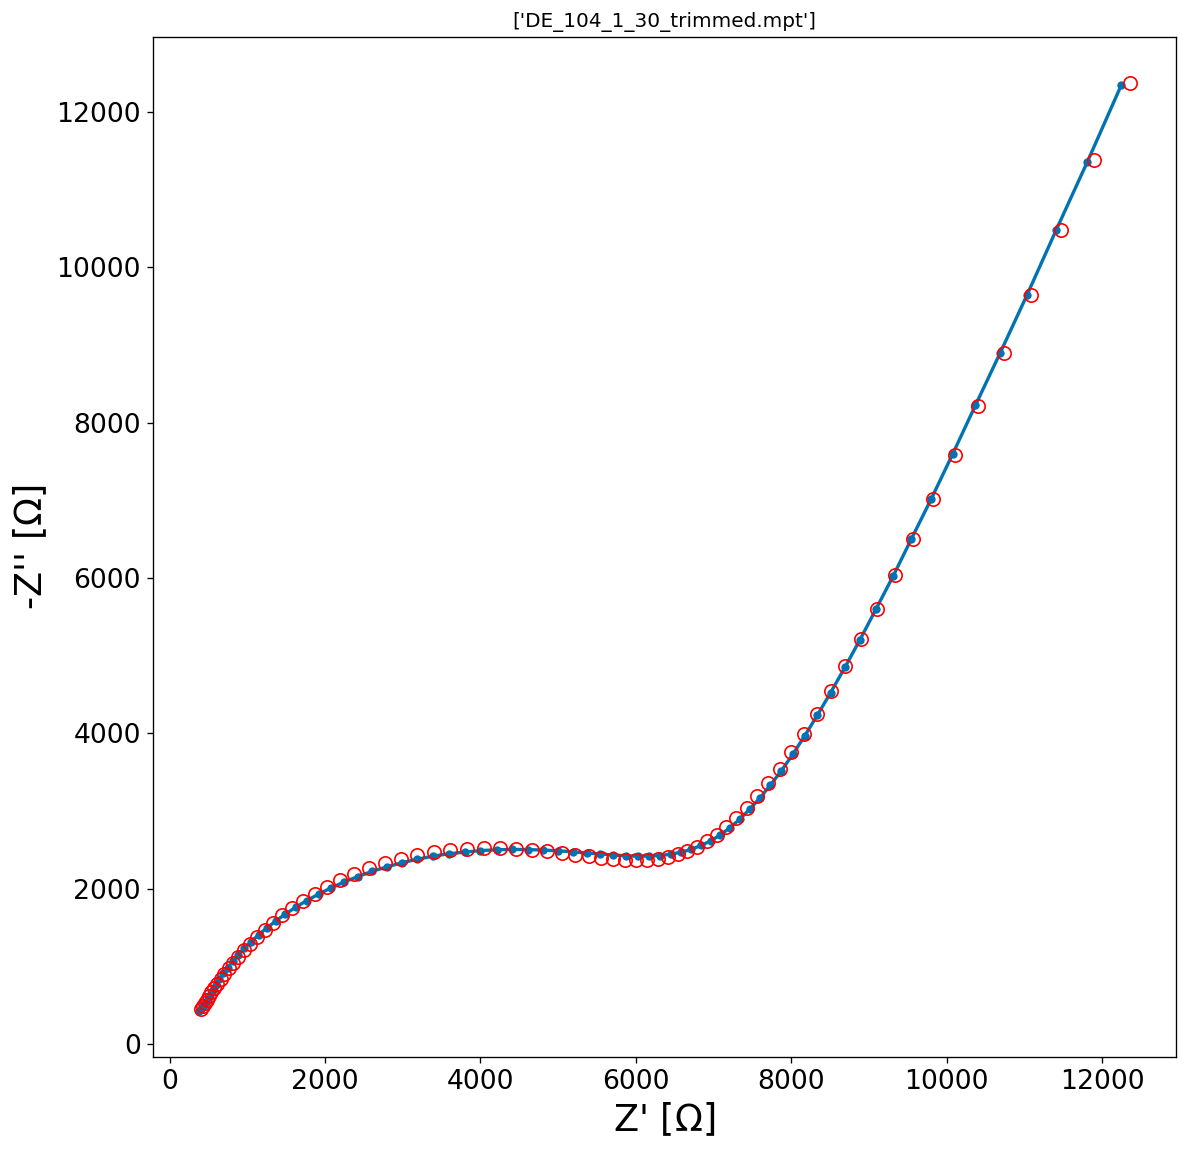

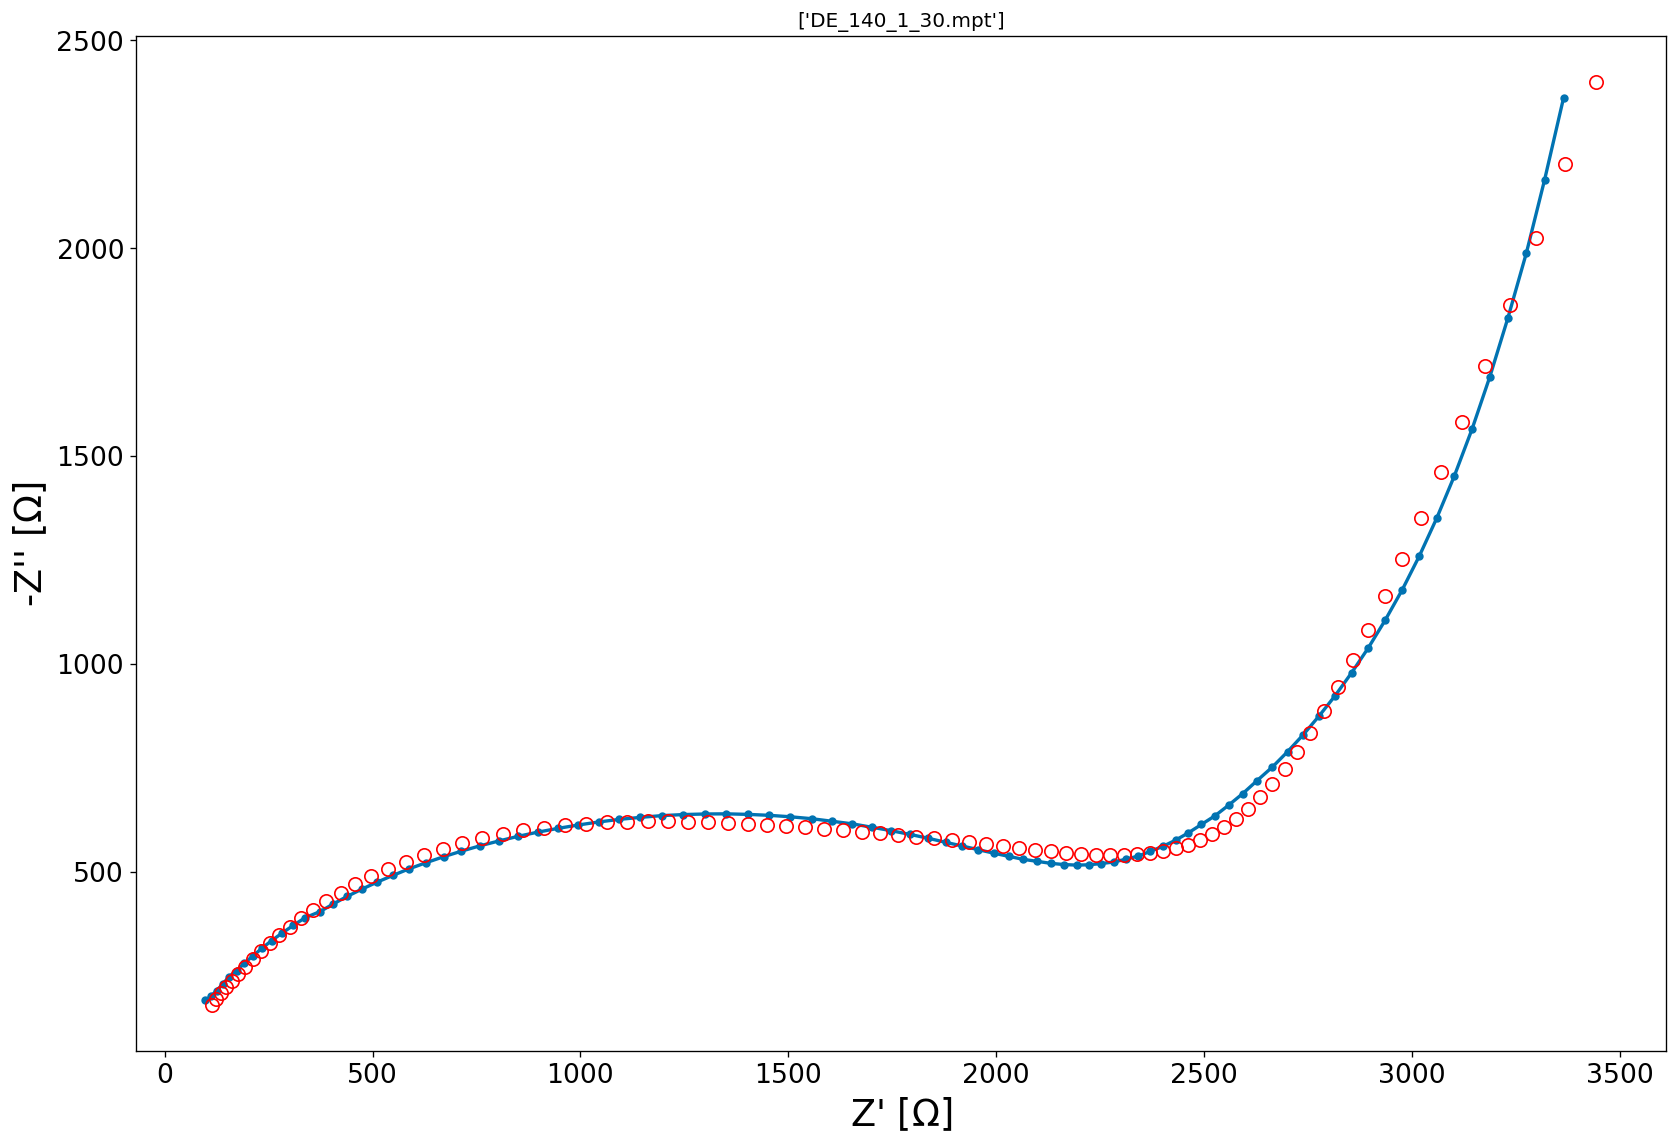

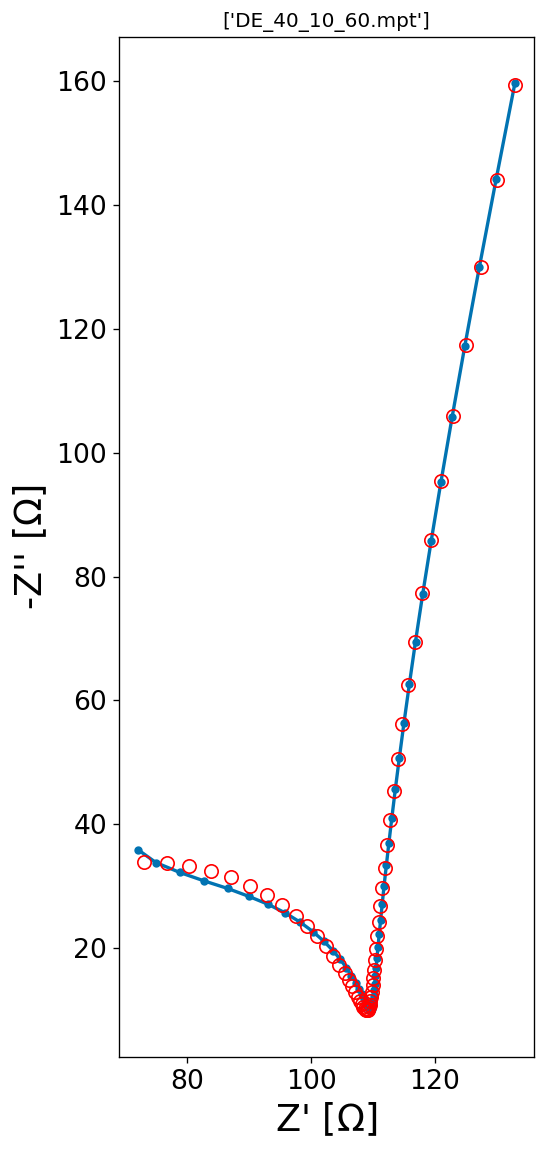

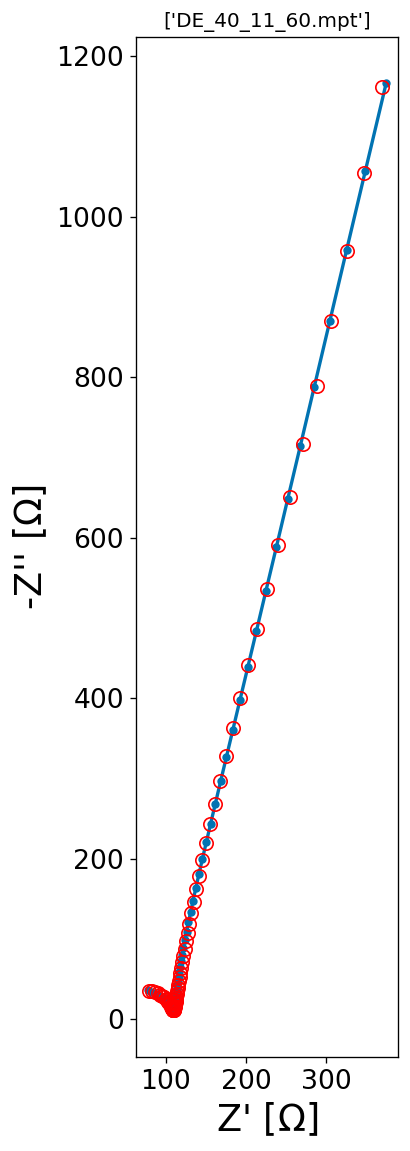

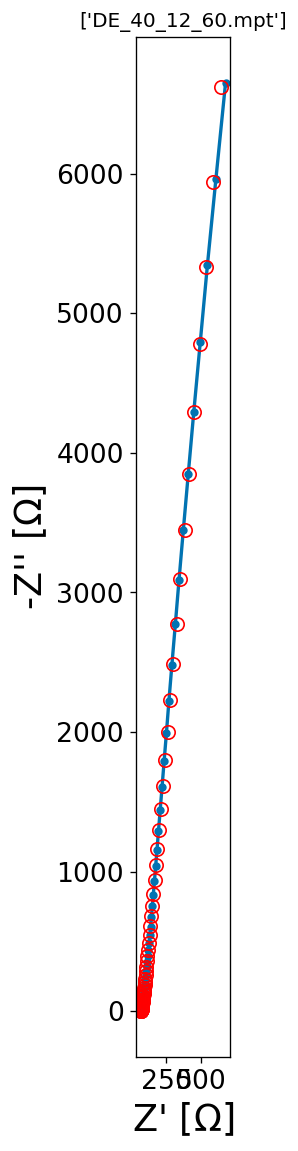

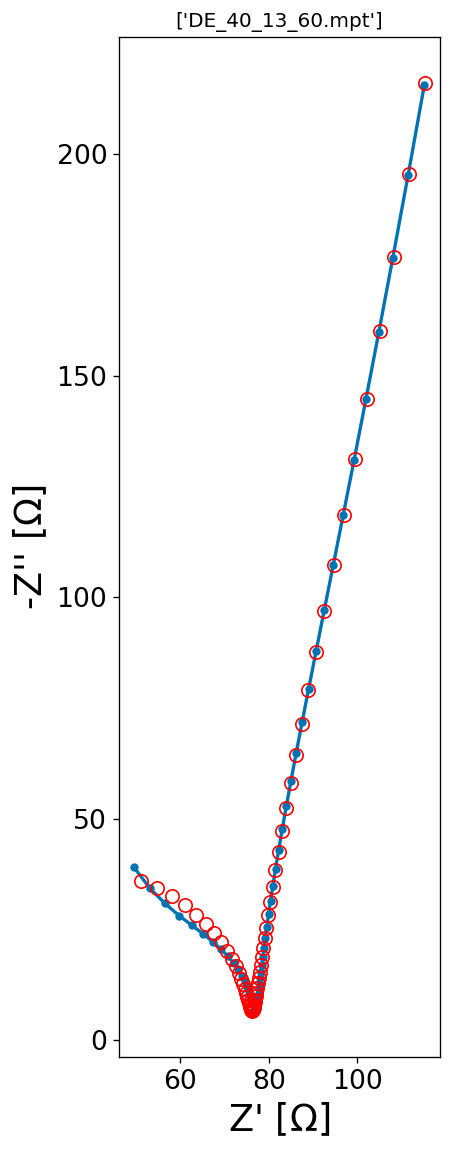

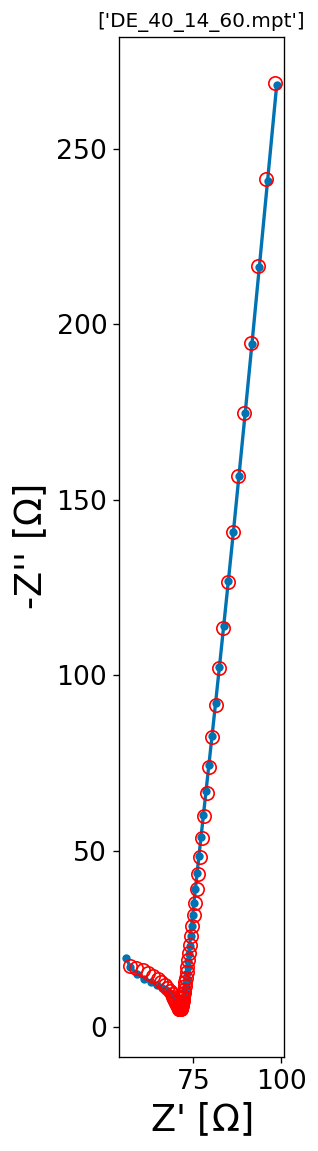

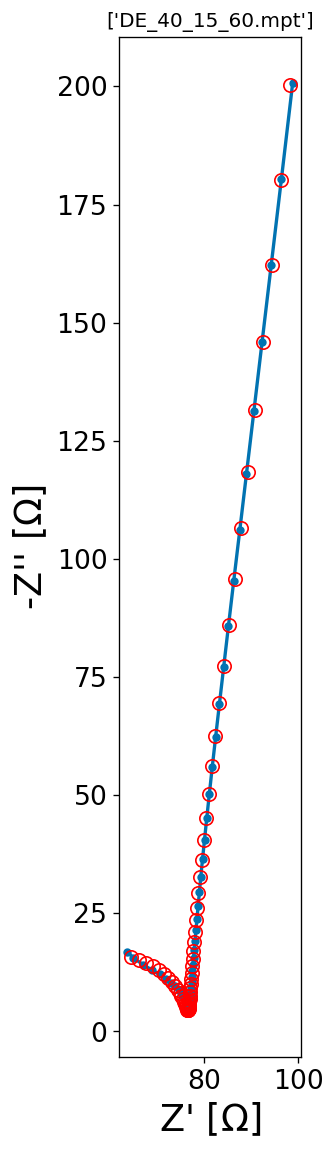

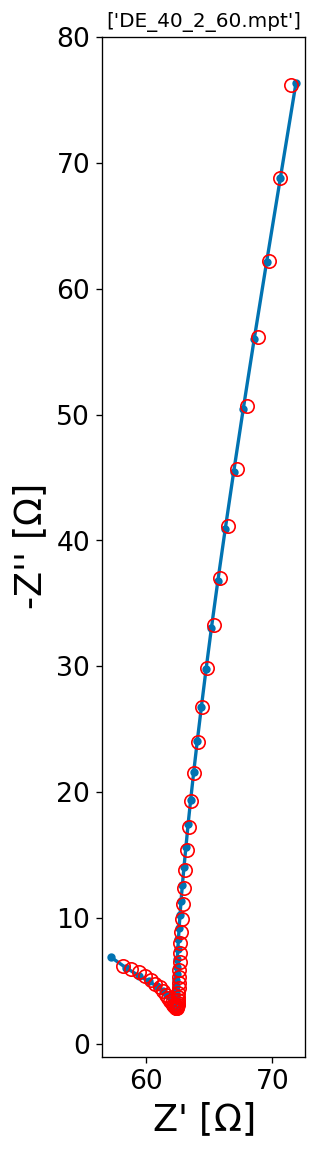

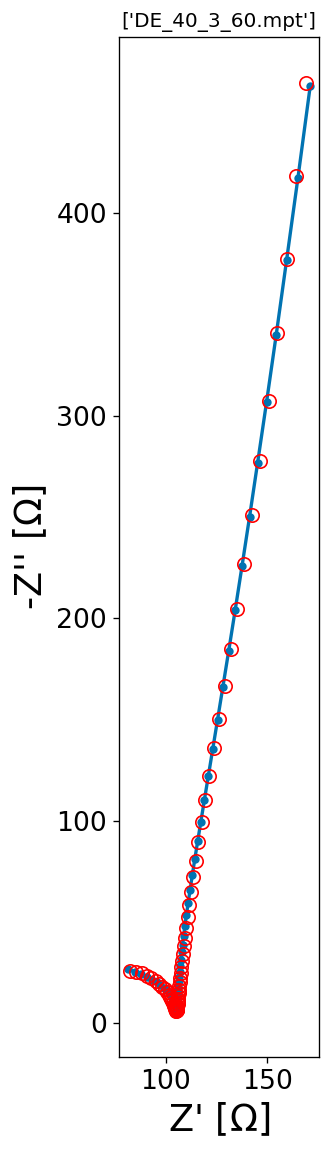

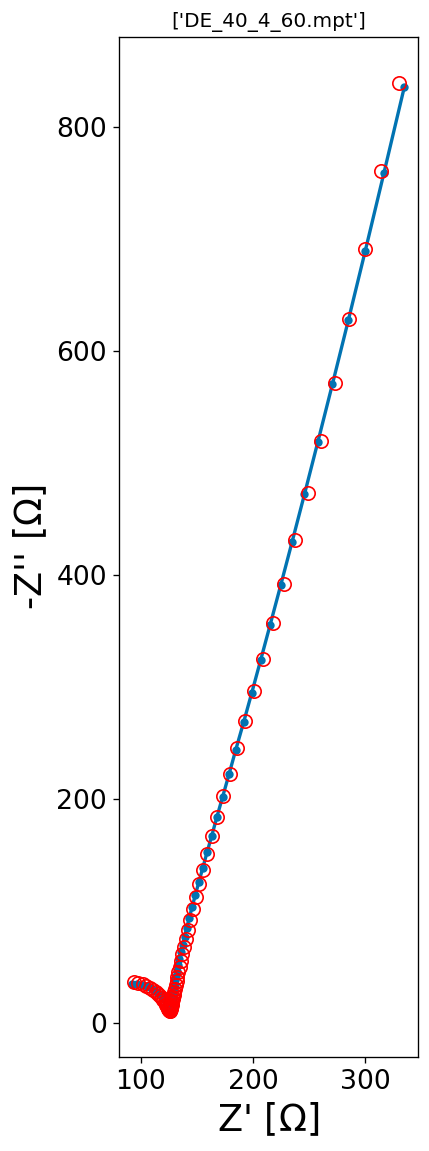

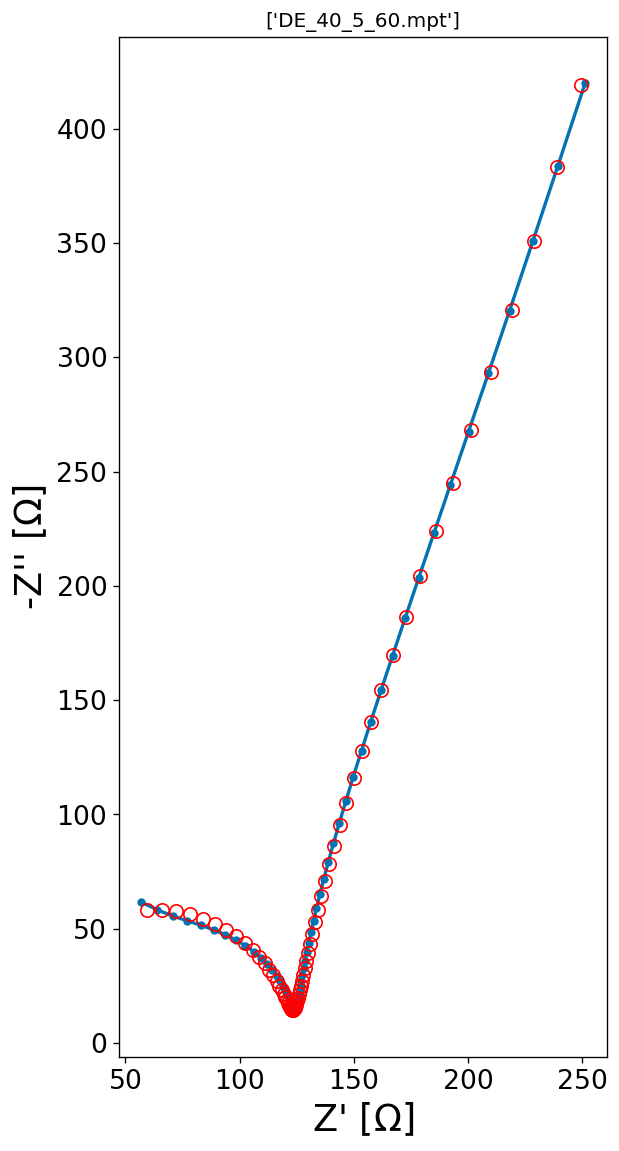

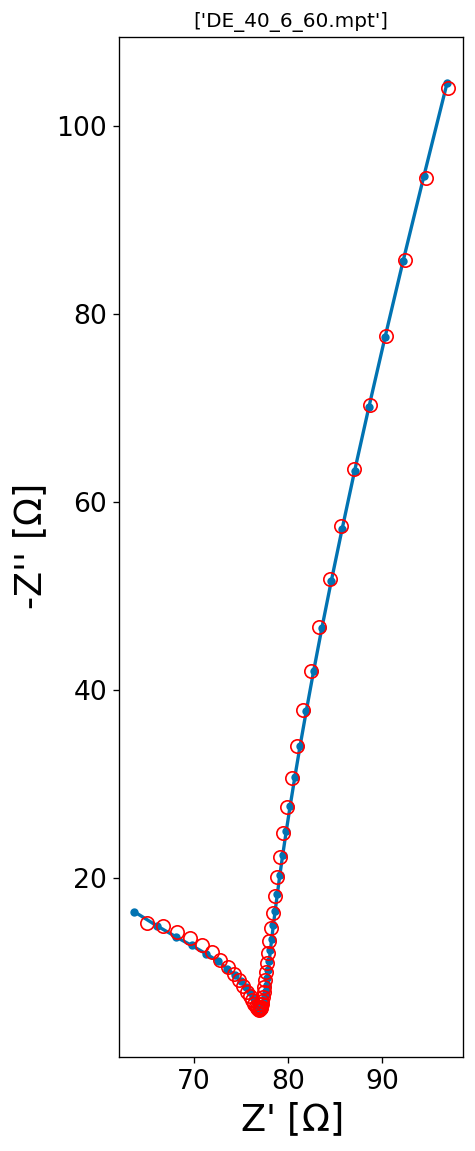

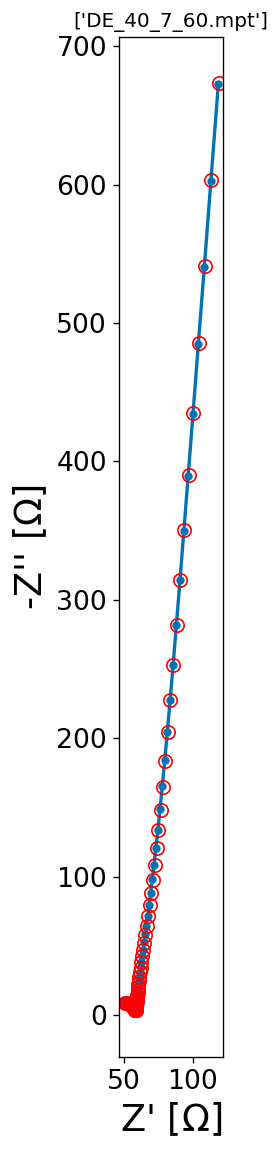

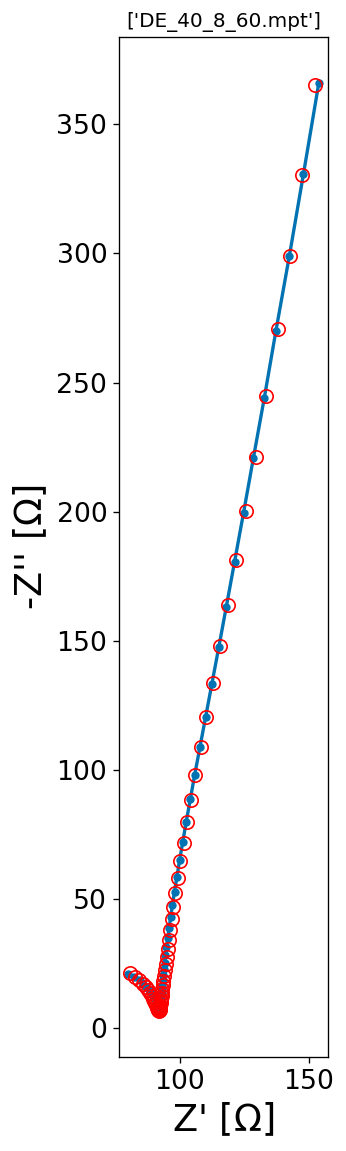

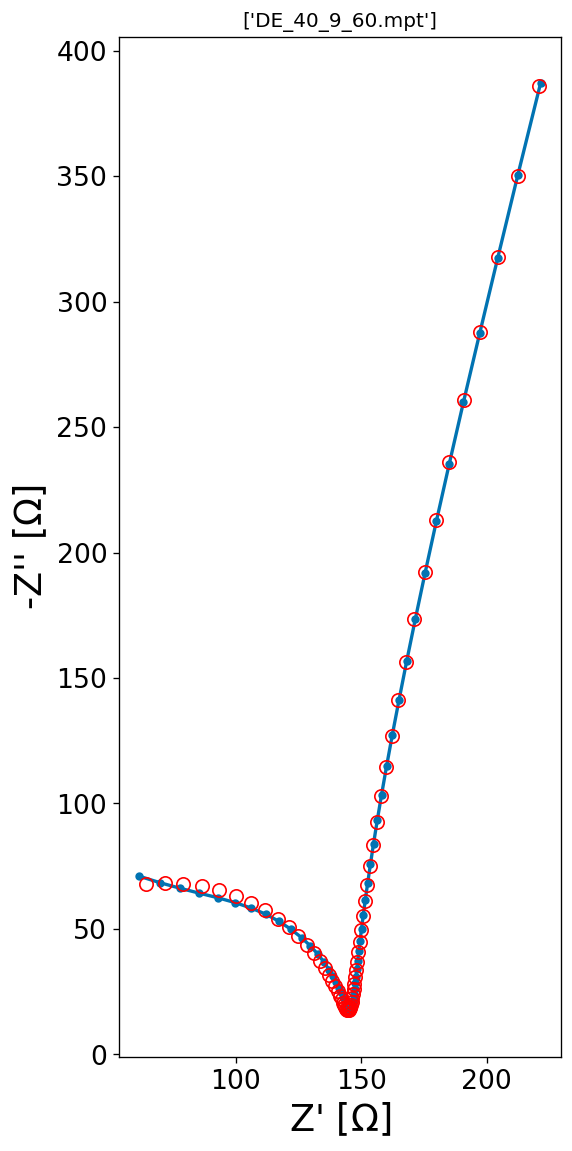

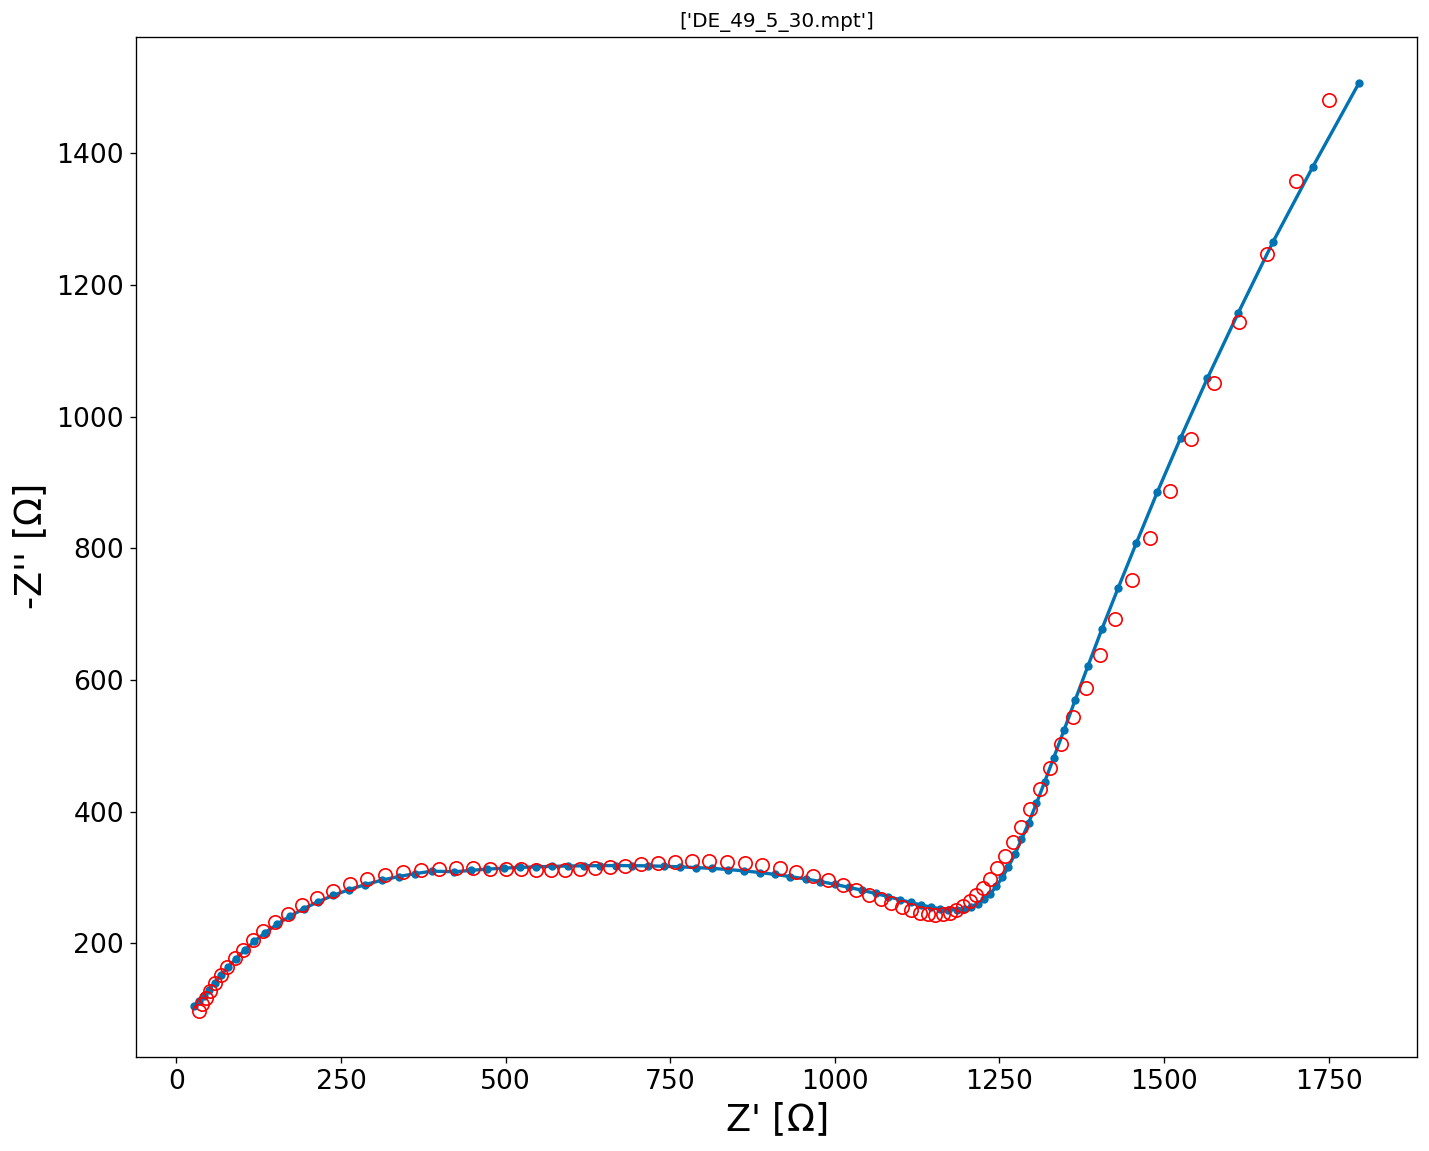

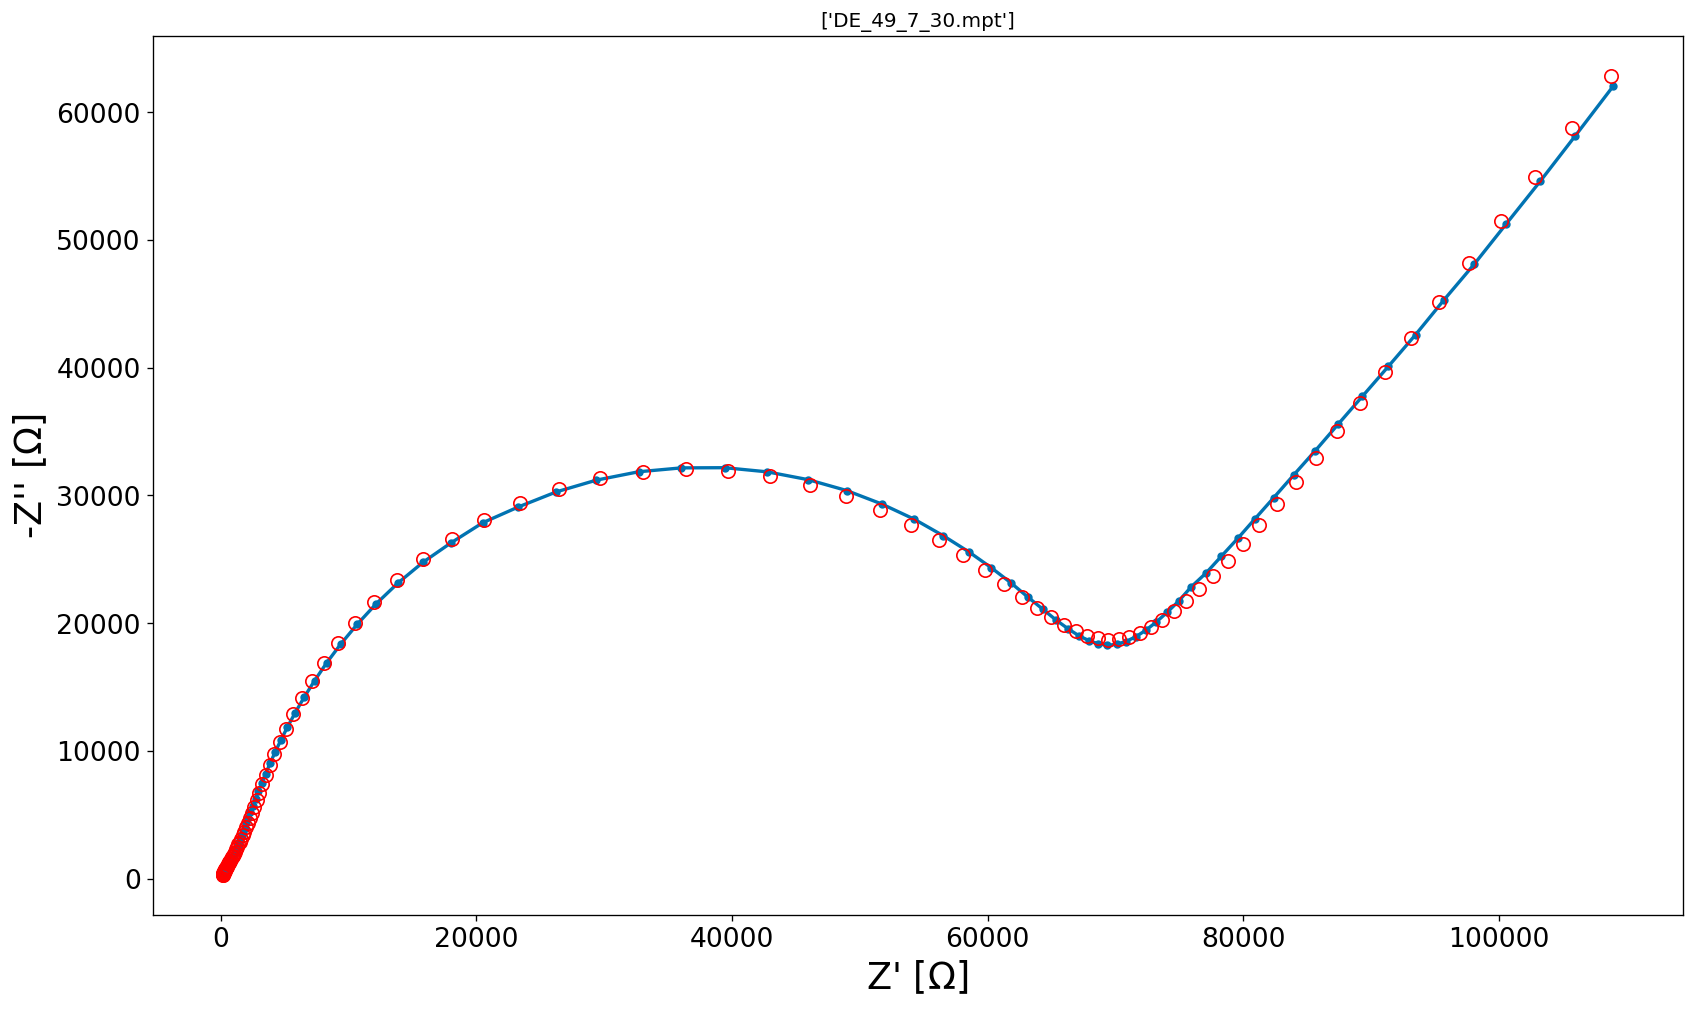

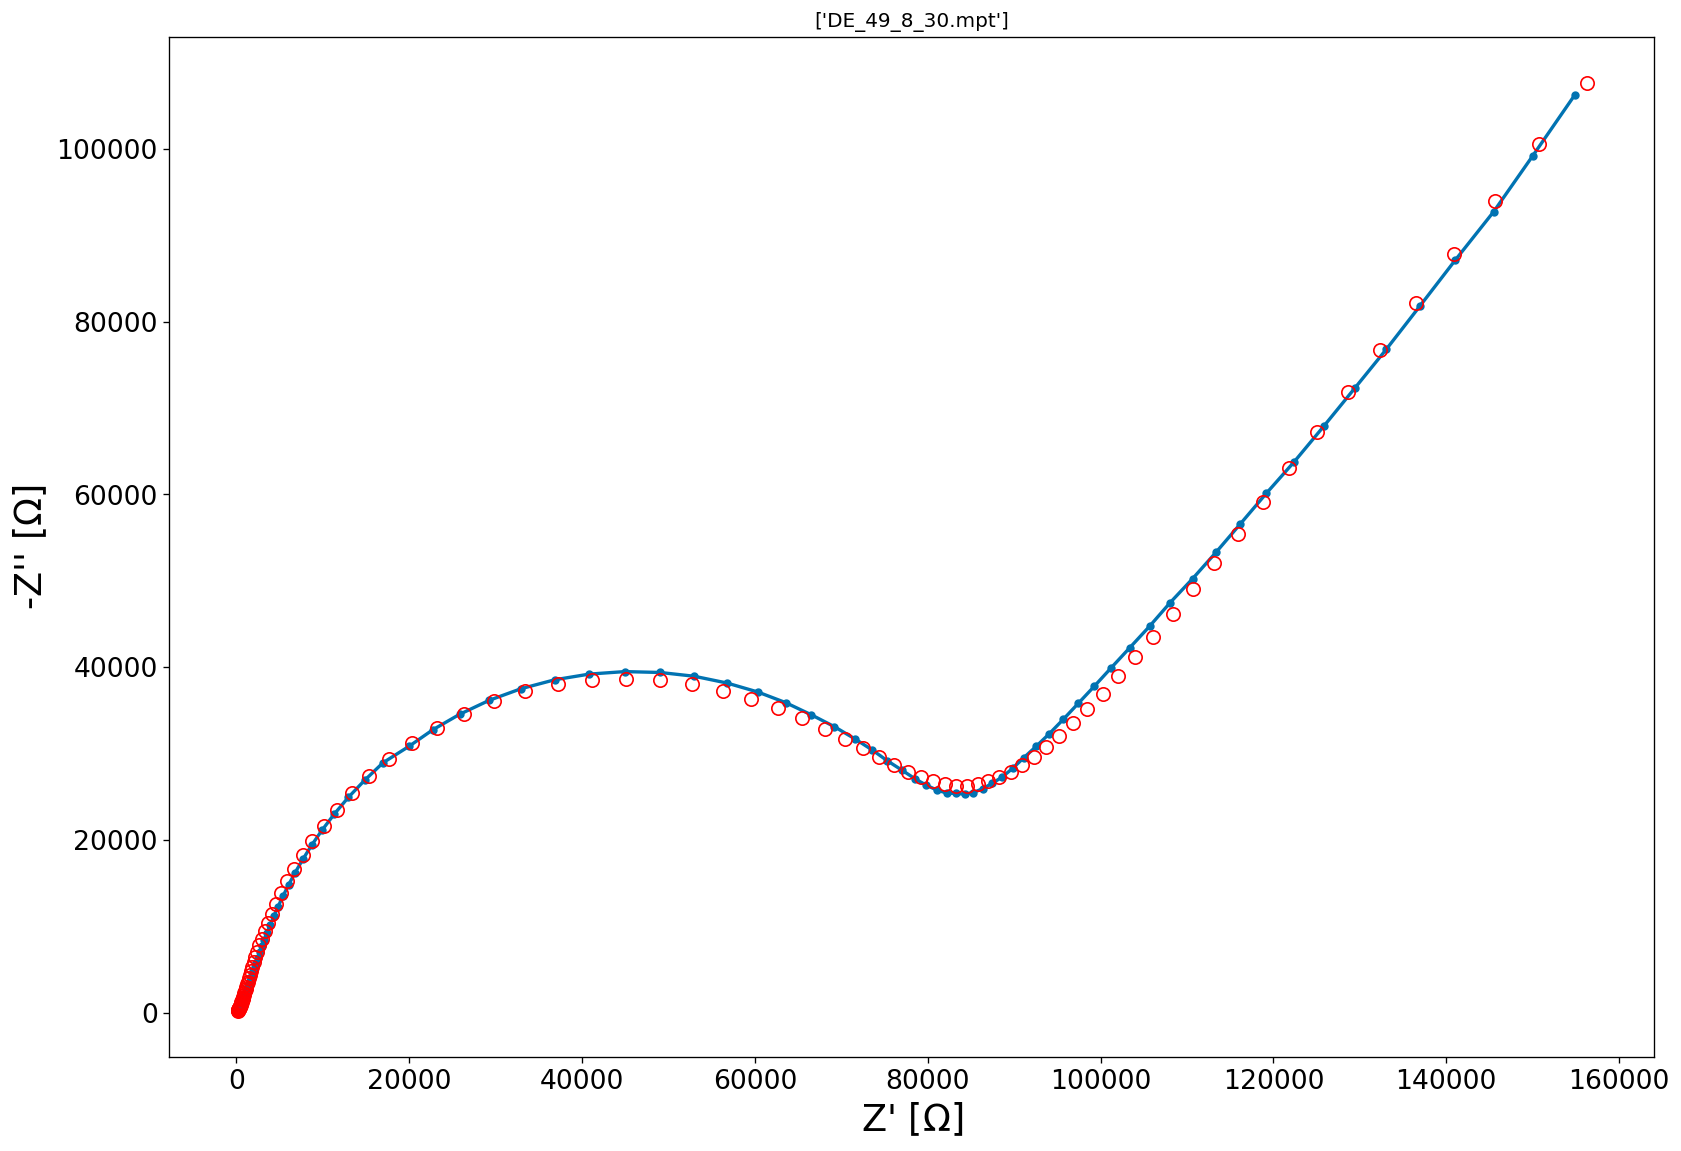

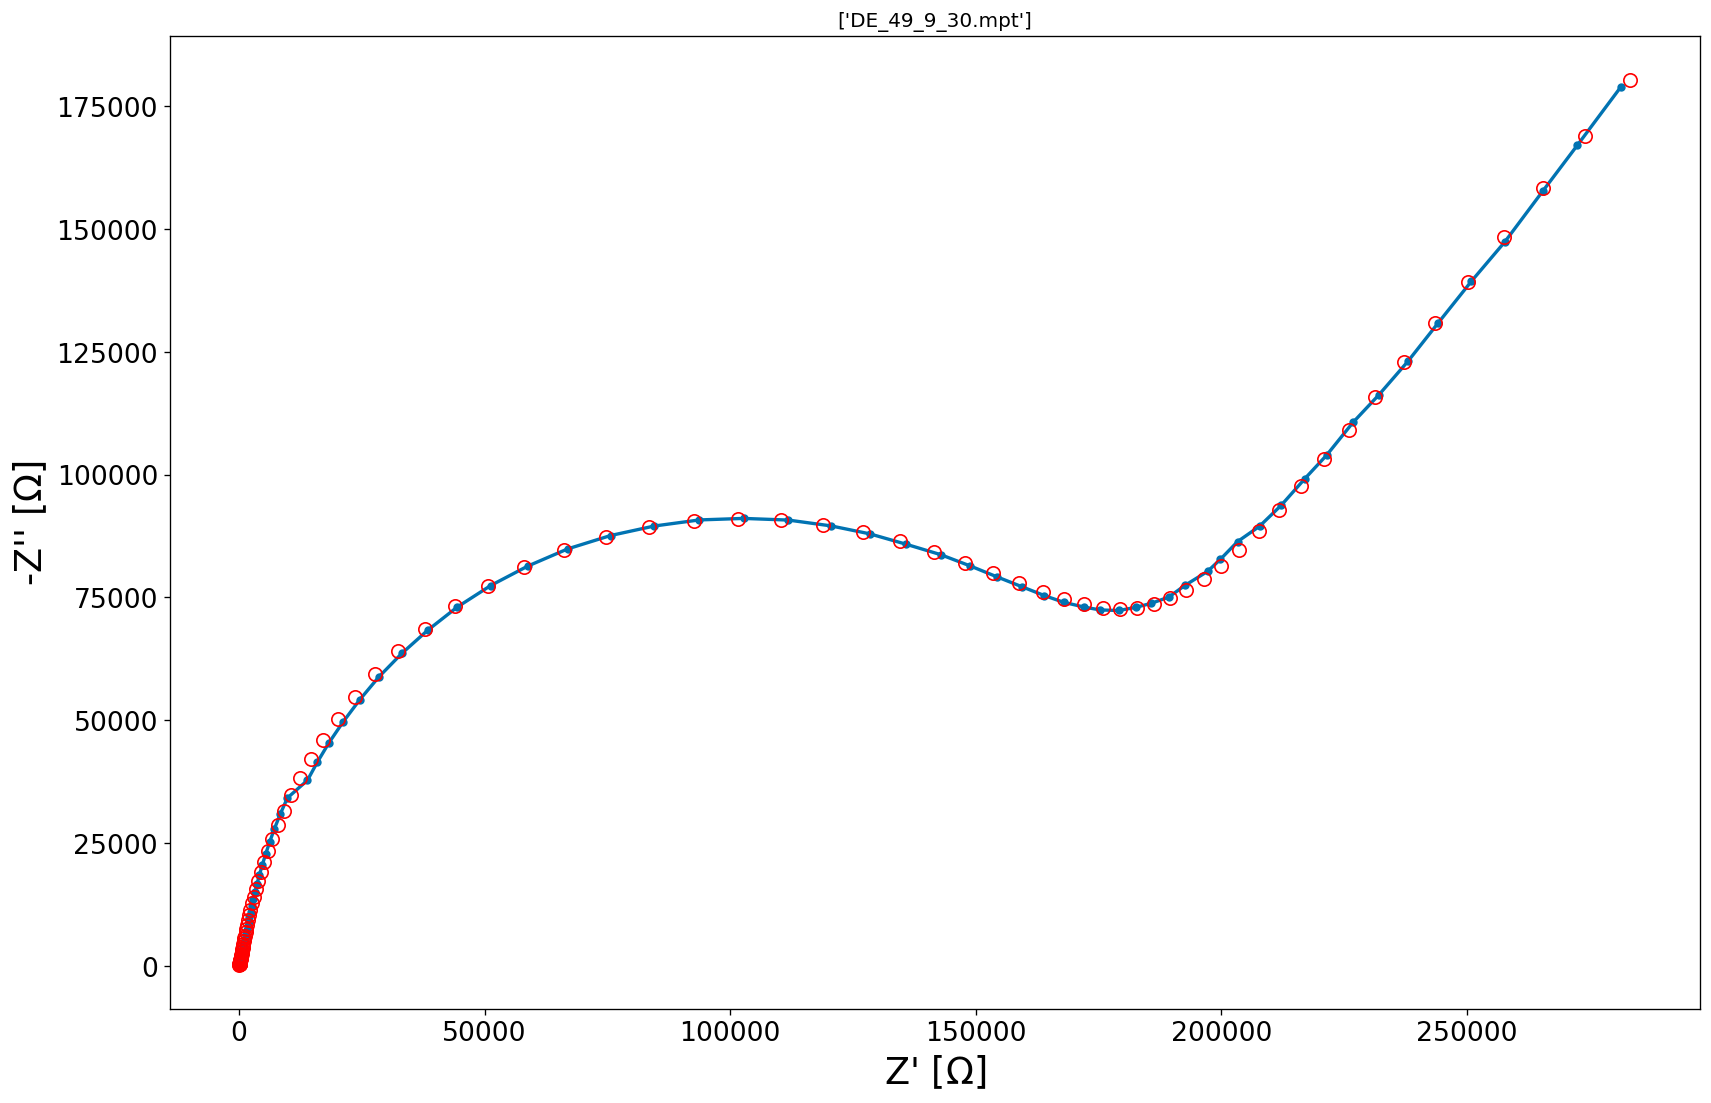

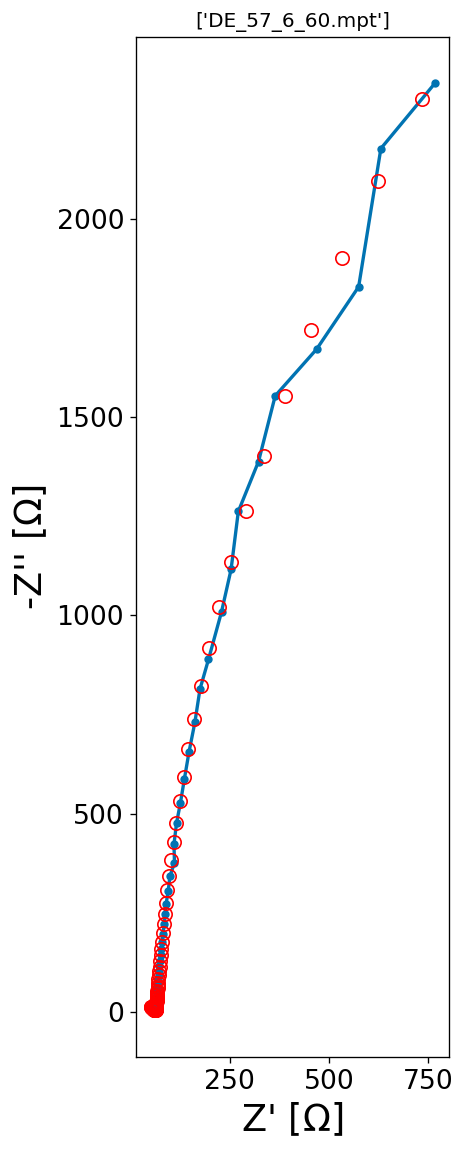

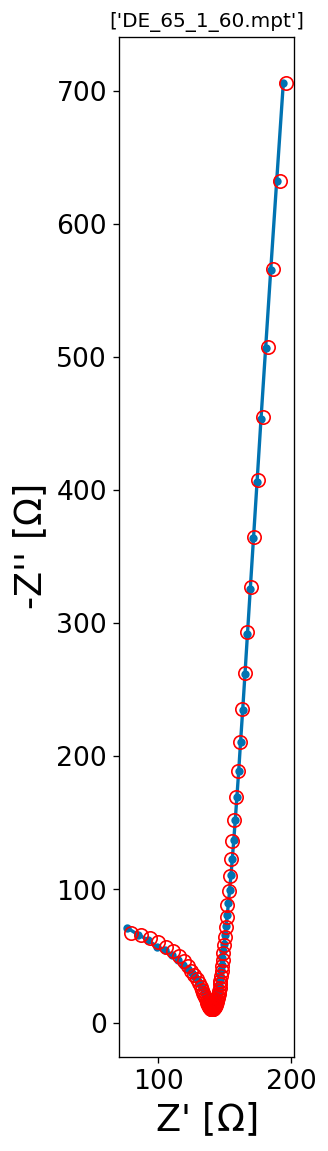

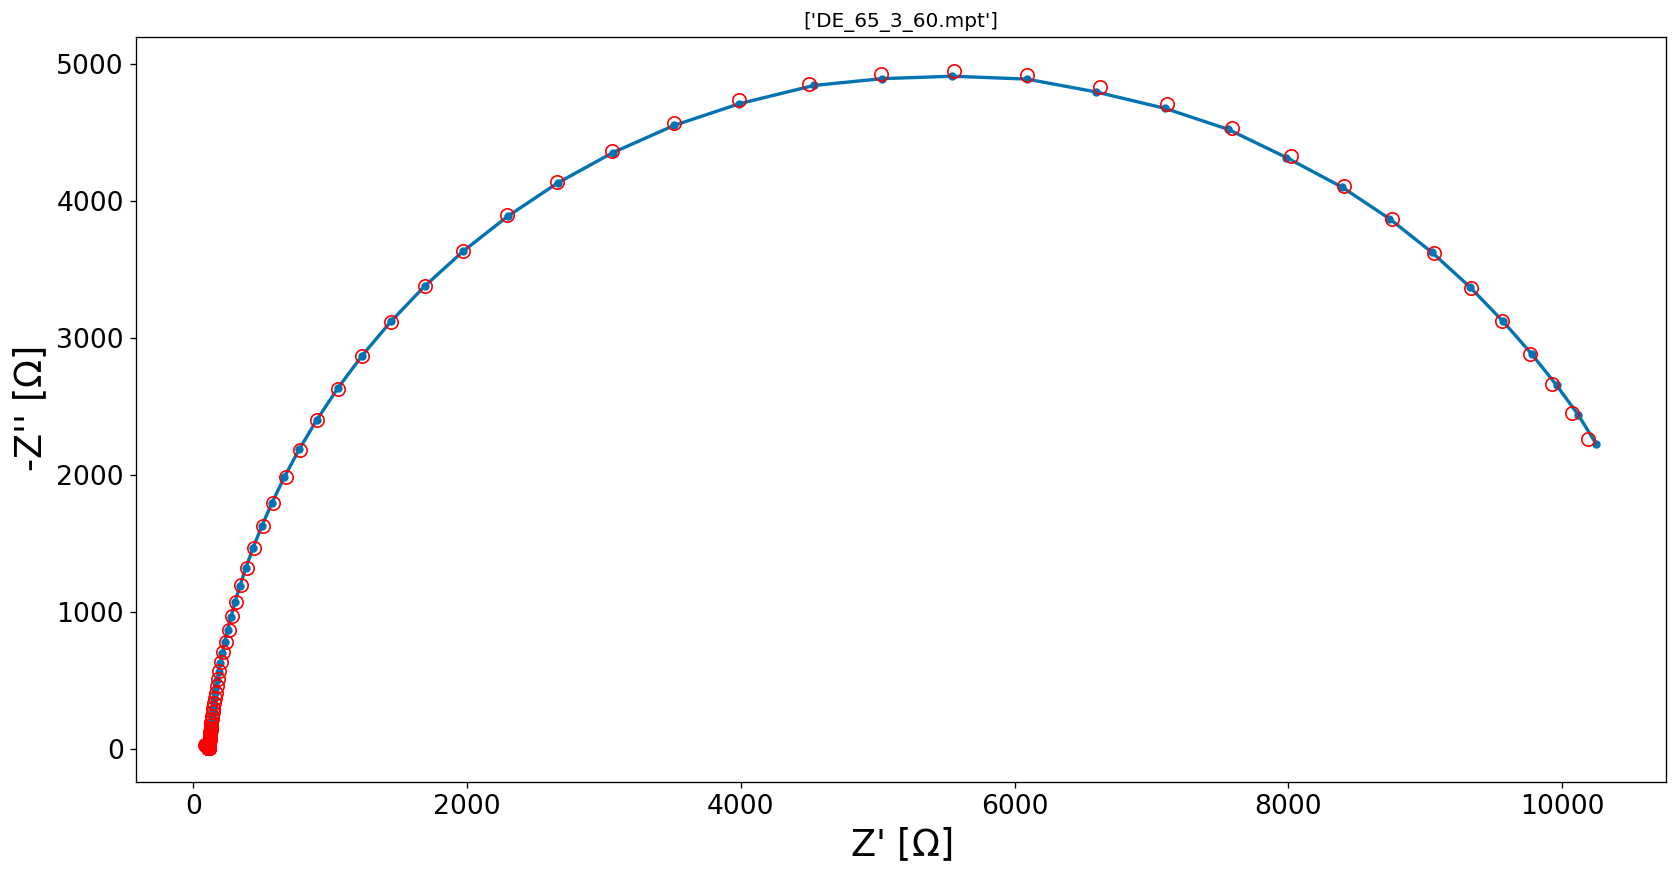

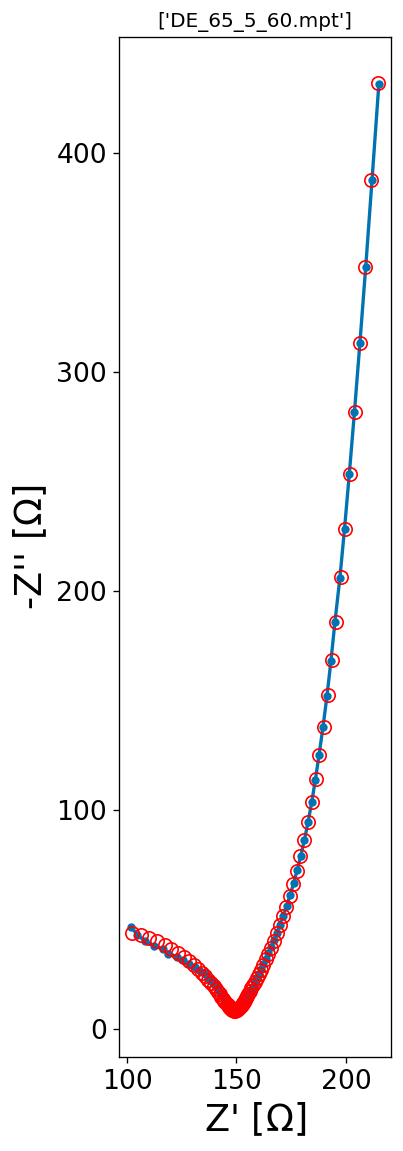

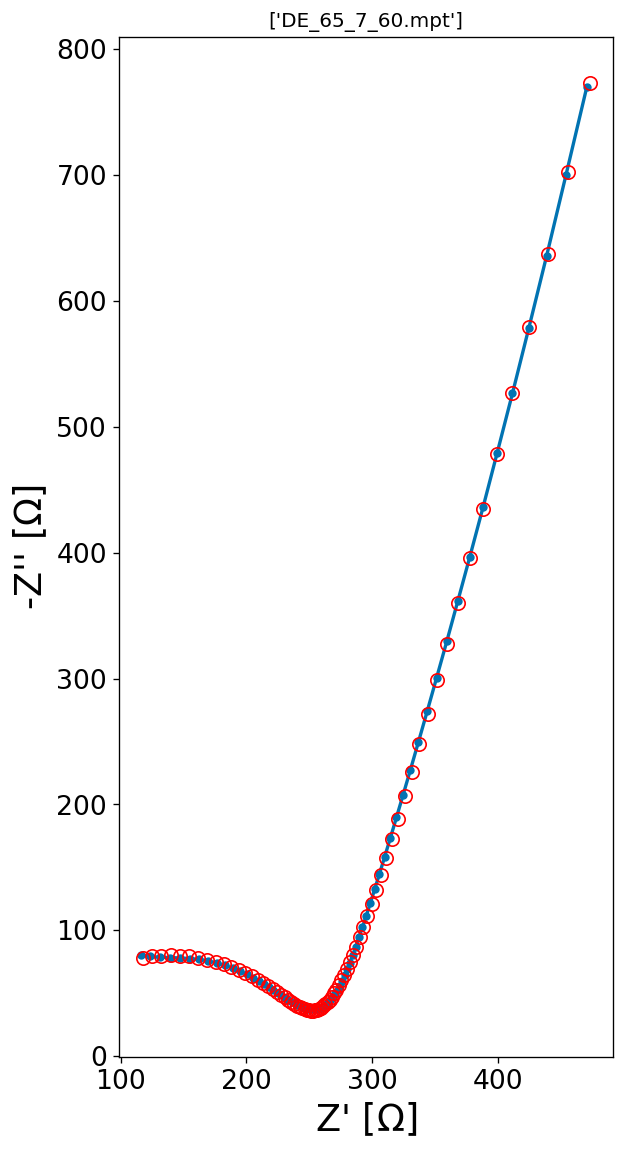

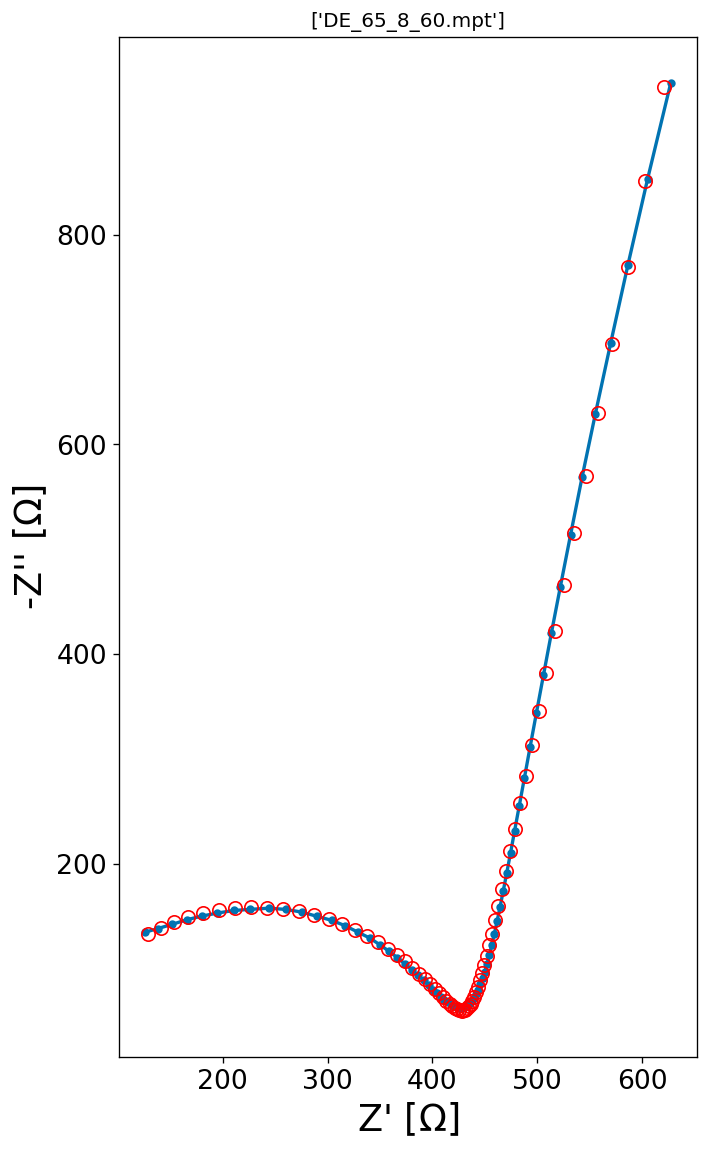

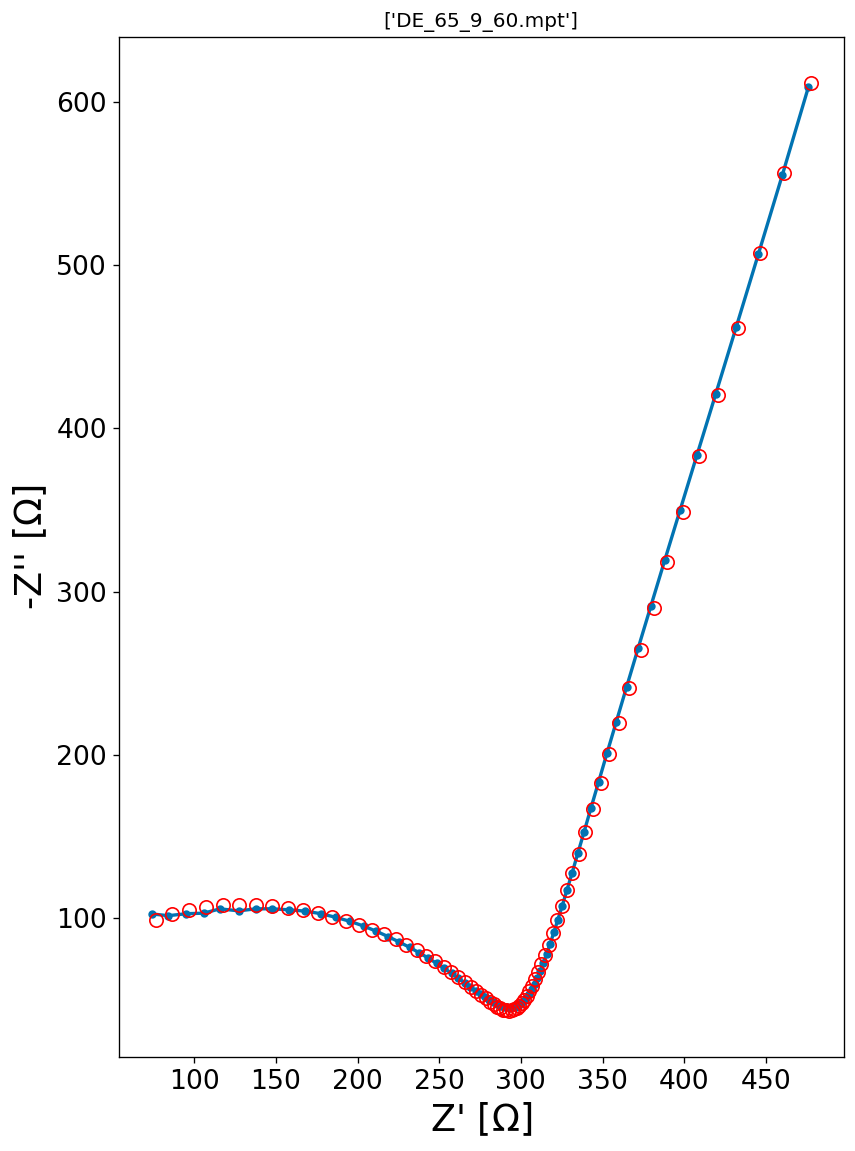

In [4]:
output = (auto_fit(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', csv = csv, save_fig = True))

In [19]:
for i in range(len(output)-1):
   output[0] = output[0].append(output[i+1])
output[0].drop(columns = ['fit_fs1', 'fit_fs2'], inplace = True)


In [27]:
final_output = output[0]
final_output

,file,fit_Rs,fit_R1,fit_n1,fit_Q1,fit_R2,fit_n2,fit_Q2,fit_Q3,fit_n3
0,copy.mpt,0.026666,732.368038,0.769776,2.530033e-07,474.354309,0.907655,8.120855e-09,5.507495e-06,0.795344
0,DE_104_10_30.mpt,138.720179,6710.907026,0.788695,9.344478e-09,90279.664673,0.516018,4.412627e-06,2.893672e-07,0.853413
0,DE_104_10_30orig.mpt,151.953820,6616.935486,0.791897,8.980059e-09,78324.465887,0.553790,2.378305e-06,1.959147e-07,0.945941
0,DE_104_1_30.mpt,187.458534,25009.482763,0.640625,6.807568e-05,6379.341990,0.757599,1.482815e-08,4.931074e-07,0.705081
0,DE_104_1_30_trimmed.mpt,185.402423,30620.000000,1.000000,3.614371e-07,6340.243899,0.758064,1.485567e-08,7.364200e-07,0.668697
0,DE_140_1_30.mpt,0.097885,1114.720614,0.744351,5.577766e-08,1562.492017,0.597695,1.293236e-06,4.897727e-06,0.783363
0,DE_40_10_60.mpt,37.838897,78.946969,0.914491,4.542254e-06,71.593148,0.958156,4.366559e-09,7.846793e-07,0.999998
0,DE_40_11_60.mpt,39.440854,181.252484,0.877690,8.717595e-06,69.559514,1.000000,2.259022e-09,1.486499e-06,0.914221
0,DE_40_12_60.mpt,45.872537,14.142795,1.000000,9.532005e-06,24.987249,1.000000,7.213202e-09,1.935182e-06,0.945868
0,DE_40_13_60.mpt,0.049487,14.307842,1.000000,1.133431e-05,75.871462,1.000000,1.462823e-09,2.481276e-06,0.911629


In [28]:
final_output.to_csv(r"C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\utils\fitted_folder\\output.txt", sep = ",", index=False)